# note: need to install a separate pandas-datareader package

In [6]:
import pandas_datareader.data as web
display(web.get_data_yahoo('AAPL')) #apple 的股票號碼

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-01,24.177500,23.850000,24.117500,24.107500,163774000.0,22.334911
2016-02-02,24.010000,23.570000,23.855000,23.620001,149428800.0,21.883259
2016-02-03,24.209999,23.520000,23.750000,24.087500,183857200.0,22.316381
2016-02-04,24.332500,23.797501,23.965000,24.150000,185886800.0,22.495693
2016-02-05,24.230000,23.422501,24.129999,23.504999,185672400.0,21.894878
...,...,...,...,...,...,...
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.919998
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,143.160004
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,142.059998


In [7]:
display(web.DataReader('2330.TW','yahoo'))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-02,144.5,141.5,144.0,142.5,25380000.0,118.719627
2016-02-03,146.0,144.5,145.0,146.0,70465000.0,121.635536
2016-02-15,146.5,142.0,142.0,145.0,72875000.0,120.802422
2016-02-16,148.0,145.5,146.0,147.5,55006000.0,122.885239
2016-02-17,149.0,147.0,149.0,148.0,38453000.0,123.301804
...,...,...,...,...,...,...
2021-01-25,646.0,626.0,642.0,633.0,93050133.0,633.000000
2021-01-26,640.0,610.0,632.0,617.0,100153482.0,617.000000
2021-01-27,625.0,611.0,618.0,615.0,59985191.0,615.000000


In [39]:
#建立dictionary
all_data={ticker: web.get_data_yahoo(ticker) for ticker in ['2330.TW','2609.TW','2606.TW','2317.TW','2303.TW']}
all_data['2330.TW']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-02,144.5,141.5,144.0,142.5,25380000.0,118.719627
2016-02-03,146.0,144.5,145.0,146.0,70465000.0,121.635536
2016-02-15,146.5,142.0,142.0,145.0,72875000.0,120.802422
2016-02-16,148.0,145.5,146.0,147.5,55006000.0,122.885239
2016-02-17,149.0,147.0,149.0,148.0,38453000.0,123.301804
...,...,...,...,...,...,...
2021-01-25,646.0,626.0,642.0,633.0,93050133.0,633.000000
2021-01-26,640.0,610.0,632.0,617.0,100153482.0,617.000000
2021-01-27,625.0,611.0,618.0,615.0,59985191.0,615.000000


In [40]:
import pandas as pd
# to loop through the keys and values of a dict:   note .items()

price=pd.DataFrame({key:value['Adj Close'] for key,value in all_data.items()})

# rename()
price.rename(columns = {'2330.TW':'台積電','2609.TW':'長榮','2606.TW':'陽明','2317.TW':'鴻海','2303.TW':'聯電'}, inplace = True)

price


,台積電,長榮,陽明,鴻海,聯電
Date,,,,,
2016-02-02,118.719627,17.025526,20.153885,72.541656,10.610269
2016-02-03,121.635536,16.815334,20.033203,70.876160,10.448280
2016-02-15,120.802422,16.752277,19.791842,69.118126,10.691263
2016-02-16,122.885239,17.130623,20.475706,70.876160,10.650766
2016-02-17,123.301804,16.941450,20.475706,70.968689,10.731759
...,...,...,...,...,...
2021-01-25,633.000000,23.000000,34.299999,123.000000,57.200001
2021-01-26,617.000000,21.600000,33.599998,122.000000,54.799999
2021-01-27,615.000000,20.799999,33.049999,123.000000,54.799999


<IPython.core.display.Javascript object>


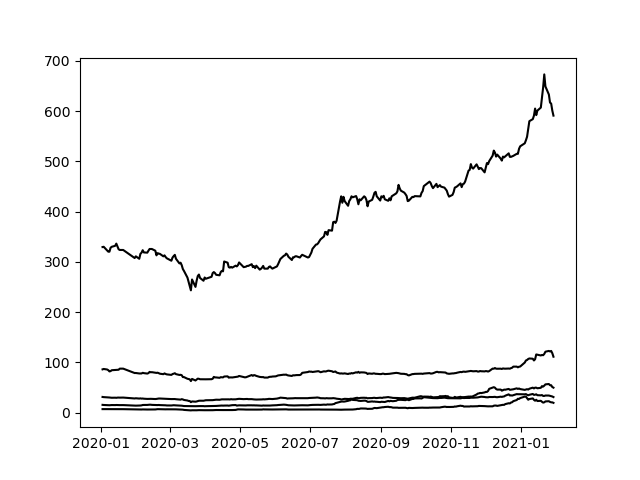

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(price['2020-01-01':], 'k')

In [37]:
price.pct_change().tail() *100

,台積電,長榮,陽明,鴻海
Date,,,,
2021-01-25,-2.465331,1.769910,-0.145558,1.234568
2021-01-26,-2.527646,-6.086955,-2.040819,-0.813008
2021-01-27,-0.324149,-3.703709,-1.636903,0.819672
2021-01-28,-2.276423,-0.480762,-1.966710,-3.658537
2021-01-29,-1.663894,-4.589375,-3.549387,-5.907173


In [42]:
price.corr()

,台積電,長榮,陽明,鴻海,聯電
台積電,1.000000,-0.089103,0.574980,-0.053509,0.897119
長榮,-0.089103,1.000000,-0.269206,0.361611,0.265304
陽明,0.574980,-0.269206,1.000000,0.233099,0.463323
鴻海,-0.053509,0.361611,0.233099,1.000000,0.109967
聯電,0.897119,0.265304,0.463323,0.109967,1.000000
